<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/Kernel_Trick_in_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

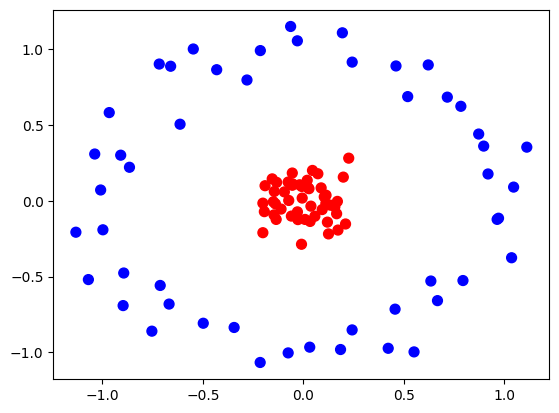

In [8]:
x, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='bwr')


In [14]:
x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=10)
cl=SVC(kernel='linear')
cl.fit(x_train,y_train)
y_pred=cl.predict(x_test)
accuracy_score(y_test, y_pred)

0.45

<ipython-input-16-14915f1db27b>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


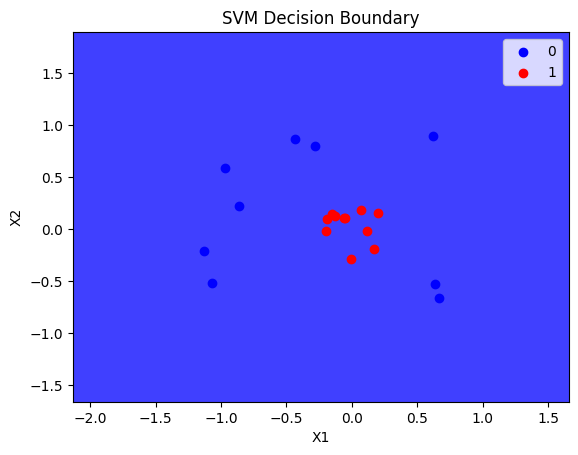

In [16]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()
plot_decision_boundary(x_test, y_test, cl)

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

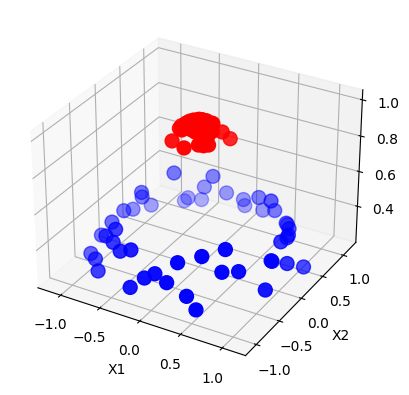

In [18]:
### now lets see rbf what rbf done in the data
## rbf is radial basis function and is given by np.exp(-(X ** 2).sum(1))

def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))  ### see how this function ne 3d mai convert kar diya points ko upar utha diya now it will be easy to cut through a plane
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax
plot_3d_plot(x,y)

In [22]:
### getting rbf kernel

cl2=SVC(kernel='rbf')
cl2.fit(x_train,y_train)
y_pred1=cl2.predict(x_test)
accuracy_score(y_test,y_pred1)

1.0

<ipython-input-16-14915f1db27b>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


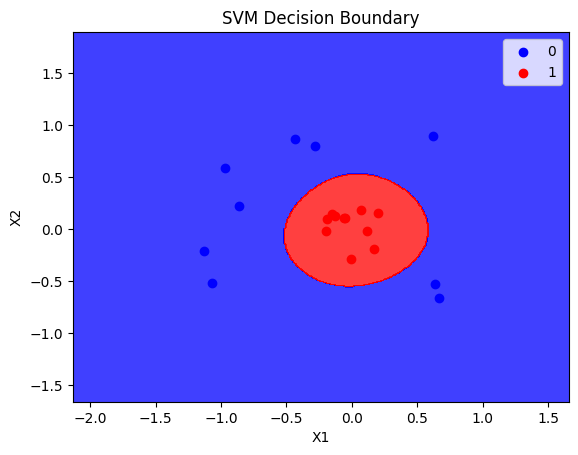

In [23]:
plot_decision_boundary(x_test, y_test, cl2)

In [25]:
## no looking at poly kernel
cl3=SVC(kernel='poly',degree=1) ## degree 1
cl3.fit(x_train,y_train)
y_pred3=cl3.predict(x_test)
accuracy_score(y_test,y_pred3)

0.45

In [26]:
## no looking at poly kernel
cl3=SVC(kernel='poly',degree=2) ## degree 2
cl3.fit(x_train,y_train)
y_pred3=cl3.predict(x_test)
accuracy_score(y_test,y_pred3)

1.0